In [1]:
# import in files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


$$\huge \text{Welcome to Our Project}$$



## Import Data and Set up Initial Data Frames


In [2]:
import pandas as pd

# bring in file
file_path = '/content/drive/My Drive/CS133_EV_Project/Electric_Vehicle_Population_Data.csv'

# create base dataframe with ev data
ev = pd.read_csv(file_path)

# preview dataset
ev.head()

VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA      98178.0        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA      98370.0        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Olalla    WA      98359.0        2023  HYUNDAI   
3  5UXTA6C0XM    Kitsap  Seabeck    WA      98380.0        2021      BMW   
4  JTMAB3FV7P  Thurston  Rainier    WA      98576.0        2023   TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL 3          Battery Electric Vehicle (BEV)   
1     MODEL Y          Battery Electric Vehicle (BEV)   
2     IONIQ 5          Battery Electric Vehicle (BEV)   
3          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicle Eligible           291.0   
2  Eligibility unknown as battery range has not b...             0.0   
3            Clean Alternative Fuel Vehicle Eligible            30.0   
4            Clean Alternative Fuel Vehicle Eligible            42.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  37.0       477309682   
1        0.0                  23.0       109705683   
2        0.0                  26.0       230390492   
3        0.0                  35.0       267929112   
4        0.0                   2.0       236505139   

              Vehicle Location                              Electric Utility  \
0  POINT (-122.23825 47.49461)  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
1  POINT (-122.64681 47.73689)                        PUGET SOUND ENERGY INC   
2  POINT (-122.54729 47.42602)                        PUGET SOUND ENERGY INC   
3  POINT (-122.81585 47.64509)                        PUGET SOUND ENERGY INC   
4  POINT (-122.68993 46.88897)                        PUGET SOUND ENERGY INC   

   2020 Census Tract  
0       5.303301e+10  
1       5.303509e+10  
2       5.303509e+10  
3       5.303509e+10  
4       5.306701e+10

In [3]:
# grab msrp csv
file_path = '/content/drive/My Drive/CS133_EV_Project/MSRPFinal.csv'

# create dataframe
msrp = pd.read_csv(file_path)

# Preview dataset, should have msrp and Type columns added
msrp.head()

Model  Model Year   msrp       Type
0  MODEL 3        2019  35000      Sedan
1  MODEL Y        2020  44990        CUV
2  IONIQ 5        2023  41450        CUV
3  MODEL S        2012  57400      Sedan
4       I3        2017  42400  Hatchback

In [4]:
# Define file path
file_path = '/content/drive/My Drive/CS133_EV_Project/0range.csv'

# create dataframe
range = pd.read_csv(file_path)

range.columns = ['Model', 'Model Year', 'Electric Range'] #rename columns
range.head() #preview dataset

Model  Model Year  Electric Range
0  IONIQ 5        2023             205
1  MODEL Y        2023             216
2  MODEL 3        2024             216
3  MODEL Y        2022             279
4     LEAF        2022             283

## Data Cleaning and Transformation


In [7]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [5]:
ev[ev['Electric Range']==0].value_counts().sum()

np.int64(139501)

In [6]:
ev[ev['Base MSRP']==0].value_counts().sum()

np.int64(231914)

139,000 Entries with ER = 0

231,000 Entries with Base MSRP = 0

Clean data by merginging original dataset with new ones

In [8]:

# filter data for BEVs only
bev = ev[ev['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

# filter data for only the Top 10 Automakers
top = ['TESLA', 'HYUNDAI', 'BMW', 'NISSAN','CHEVROLET','KIA', 'RIVIAN','VOLKSWAGEN', 'FORD', 'AUDI']
filtered = bev[bev['Make'].isin(top)].copy()

# merge the 2 dataframes on Model Year and Model
mergedf = filtered.merge(
    msrp,
    on=['Model','Model Year'],
    how='left'
)
mergedf.info()
mergedf[mergedf['Electric Range'] == 0]
## df now has msrp and Type of everyt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171362 entries, 0 to 171361
Data columns (total 19 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         171362 non-null  object 
 1   County                                             171360 non-null  object 
 2   City                                               171360 non-null  object 
 3   State                                              171362 non-null  object 
 4   Postal Code                                        171360 non-null  float64
 5   Model Year                                         171362 non-null  int64  
 6   Make                                               171362 non-null  object 
 7   Model                                              171362 non-null  object 
 8   Electric Vehicle Type                              171362 non-null  object

VIN (1-10)     County          City State  Postal Code  Model Year  \
2       KM8KRDAF5P     Kitsap        Olalla    WA      98359.0        2023   
30      7SAYGDEE8P   Thurston       Olympia    WA      98502.0        2023   
32      5YJ3E1EB2R     Yakima        Yakima    WA      98902.0        2024   
35      7SAYGDEF5N  Snohomish       Bothell    WA      98012.0        2022   
38      1N4BZ1CV2N   Thurston       Olympia    WA      98501.0        2022   
...            ...        ...           ...   ...          ...         ...   
171355  7SAYGDEE1P       King       Redmond    WA      98053.0        2023   
171357  5YJ3E1EA1P     Benton      Richland    WA      99352.0        2023   
171358  7SAYGDEE2P       King       Seattle    WA      98109.0        2023   
171360  WA1BCBFZ6P  Snohomish  Lake Stevens    WA      98258.0        2023   
171361  WBY33AW03P       King      Issaquah    WA      98027.0        2023   

           Make    Model           Electric Vehicle Type  \
2       HYUNDAI  IONIQ 5  Battery Electric Vehicle (BEV)   
30        TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
32        TESLA  MODEL 3  Battery Electric Vehicle (BEV)   
35        TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
38       NISSAN     LEAF  Battery Electric Vehicle (BEV)   
...         ...      ...                             ...   
171355    TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
171357    TESLA  MODEL 3  Battery Electric Vehicle (BEV)   
171358    TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
171360     AUDI       Q4  Battery Electric Vehicle (BEV)   
171361      BMW       I4  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
2       Eligibility unknown as battery range has not b...             0.0   
30      Eligibility unknown as battery range has not b...             0.0   
32      Eligibility unknown as battery range has not b...             0.0   
35      Eligibility unknown as battery range has not b...             0.0   
38      Eligibility unknown as battery range has not b...             0.0   
...                                                   ...             ...   
171355  Eligibility unknown as battery range has not b...             0.0   
171357  Eligibility unknown as battery range has not b...             0.0   
171358  Eligibility unknown as battery range has not b...             0.0   
171360  Eligibility unknown as battery range has not b...             0.0   
171361  Eligibility unknown as battery range has not b...             0.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
2             0.0                  26.0       230390492   
30            0.0                  22.0       253190605   
32            0.0                  14.0       269850059   
35            0.0                   1.0       207278711   
38            0.0                  22.0       180122260   
...           ...                   ...             ...   
171355        0.0                  45.0       238466189   
171357        0.0                   8.0       256373064   
171358        0.0                  36.0       272885581   
171360        0.0                  44.0       253474854   
171361        0.0                   5.0       229583490   

                   Vehicle Location  \
2       POINT (-122.54729 47.42602)   
30      POINT (-122.92333 47.03779)   
32      POINT (-120.52401 46.59739)   
35      POINT (-122.21061 47.83448)   
38      POINT (-122.89166 47.03956)   
...                             ...   
171355  POINT (-122.03287 47.68555)   
171357  POINT (-119.27372 46.27391)   
171358  POINT (-122.35022 47.63824)   
171360  POINT (-122.06402 48.01497)   
171361   POINT (-122.03439 47.5301)   

                                         Electric Utility  2020 Census Tract  \
2                                  PUGET SOUND ENERGY INC       5.303509e+10   
30                                 PUGET SOUND ENERGY INC       5.306701e+10   
32     

In [9]:
# fixing missing data (zeroes) in the Electric Range Column
import numpy as np

# perform left-merge, naming the incoming range something different
mdf = mergedf.merge(
    range,
    on=['Model','Model Year'],
    how='left',
    suffixes=('','_new')
)

# iterate trhrough mdf, wherever there is a  0 for range, take the new value
mdf['Electric Range'] = np.where(
    mdf['Electric Range']==0,
    mdf['Electric Range_new'],
    mdf['Electric Range']
)

#drop now irrelevant columns
mdf = mdf.drop(columns=['Electric Range_new', 'Base MSRP', 'VIN (1-10)', 'DOL Vehicle ID'])

print(mdf[mdf['Electric Range'] == 0]) # should return and print empty dataframe!
mdf.head()

Empty DataFrame
Columns: [County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Legislative District, Vehicle Location, Electric Utility, 2020 Census Tract, msrp, Type]
Index: []


County      City State  Postal Code  Model Year     Make    Model  \
0      King   Seattle    WA      98178.0        2019    TESLA  MODEL 3   
1    Kitsap   Poulsbo    WA      98370.0        2020    TESLA  MODEL Y   
2    Kitsap    Olalla    WA      98359.0        2023  HYUNDAI  IONIQ 5   
3  Thurston   Olympia    WA      98502.0        2012    TESLA  MODEL S   
4      King  Bellevue    WA      98004.0        2017      BMW       I3   

            Electric Vehicle Type  \
0  Battery Electric Vehicle (BEV)   
1  Battery Electric Vehicle (BEV)   
2  Battery Electric Vehicle (BEV)   
3  Battery Electric Vehicle (BEV)   
4  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicle Eligible           291.0   
2  Eligibility unknown as battery range has not b...           205.0   
3            Clean Alternative Fuel Vehicle Eligible           265.0   
4            Clean Alternative Fuel Vehicle Eligible            81.0   

   Legislative District             Vehicle Location  \
0                  37.0  POINT (-122.23825 47.49461)   
1                  23.0  POINT (-122.64681 47.73689)   
2                  26.0  POINT (-122.54729 47.42602)   
3                  22.0  POINT (-122.92333 47.03779)   
4                  48.0   POINT (-122.1872 47.61001)   

                                Electric Utility  2020 Census Tract   msrp  \
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  35000   
1                         PUGET SOUND ENERGY INC       5.303509e+10  44990   
2                         PUGET SOUND ENERGY INC       5.303509e+10  41450   
3                         PUGET SOUND ENERGY INC       5.306701e+10  57400   
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  42400   

        Type  
0      Sedan  
1        CUV  
2        CUV  
3      Sedan  
4  Hatchback

In [10]:
# Extra data cleaning to remove outliers and

mdf = mdf[mdf['Model'] != 'SPARK'] ## drop spark as that was an experimental car with 7k msrp
mdf = mdf.dropna(subset=['Vehicle Location']) # drop rows missing location data
mdf = mdf.dropna(subset=['Legislative District']) # drop rows missing legislative distr data

mdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170783 entries, 0 to 171361
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             170783 non-null  object 
 1   City                                               170783 non-null  object 
 2   State                                              170783 non-null  object 
 3   Postal Code                                        170783 non-null  float64
 4   Model Year                                         170783 non-null  int64  
 5   Make                                               170783 non-null  object 
 6   Model                                              170783 non-null  object 
 7   Electric Vehicle Type                              170783 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  170783 non-null  object 
 9 

The Data frame should be ready for Plotting, Mapping, and Machine Learning!

## Plotting and Map Visualization

In [ ]:
# Create latitude and longitude values from Vehicle location
# extract out the individual lat and lon values using regex
coords = mdf['Vehicle Location'] \
    .str.extract(r'POINT \(\s*([-\d\.]+)\s+([-\d\.]+)\s*\)')

mdf2 = mdf.copy()
# store them back into the df as new columns
mdf2['lon'] = coords[0].astype(float)
mdf2['lat'] = coords[1].astype(float)
mdf2.head()

County      City State  Postal Code  Model Year     Make    Model  \
0      King   Seattle    WA      98178.0        2019    TESLA  MODEL 3   
1    Kitsap   Poulsbo    WA      98370.0        2020    TESLA  MODEL Y   
2    Kitsap    Olalla    WA      98359.0        2023  HYUNDAI  IONIQ 5   
3  Thurston   Olympia    WA      98502.0        2012    TESLA  MODEL S   
4      King  Bellevue    WA      98004.0        2017      BMW       I3   

            Electric Vehicle Type  \
0  Battery Electric Vehicle (BEV)   
1  Battery Electric Vehicle (BEV)   
2  Battery Electric Vehicle (BEV)   
3  Battery Electric Vehicle (BEV)   
4  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicle Eligible           291.0   
2  Eligibility unknown as battery range has not b...           205.0   
3            Clean Alternative Fuel Vehicle Eligible           265.0   
4            Clean Alternative Fuel Vehicle Eligible            81.0   

   Legislative District             Vehicle Location  \
0                  37.0  POINT (-122.23825 47.49461)   
1                  23.0  POINT (-122.64681 47.73689)   
2                  26.0  POINT (-122.54729 47.42602)   
3                  22.0  POINT (-122.92333 47.03779)   
4                  48.0   POINT (-122.1872 47.61001)   

                                Electric Utility  2020 Census Tract   msrp  \
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  35000   
1                         PUGET SOUND ENERGY INC       5.303509e+10  44990   
2                         PUGET SOUND ENERGY INC       5.303509e+10  41450   
3                         PUGET SOUND ENERGY INC       5.306701e+10  57400   
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  42400   

        Type        lon       lat  
0      Sedan -122.23825  47.49461  
1        CUV -122.64681  47.73689  
2        CUV -122.54729  47.42602  
3      Sedan -122.92333  47.03779  
4  Hatchback -122.18720  47.61001

In [ ]:
import folium
from folium.plugins import FastMarkerCluster
import pandas as pd

# center on data’s mean point
center = [mdf2.lat.mean(), mdf2.lon.mean()]

m = folium.Map(location=center, zoom_start=6, tiles='CartoDB positron')

# build a list of [lat, lng] coordinates
coords = mdf2[['lat','lon']].values.tolist()

# add the cluster layer on top
FastMarkerCluster(data=coords,
                  radius=4,      # marker circle radius in pixels
                  color='black', # outline color
                  fill=True,
                  fill_opacity=0.6
                 ).add_to(m)

m

## 3 Machine Learning Models

Model 1: Random Forest Classification on MSRP

Cutoff edges: [0, 40000, 70000, 85000, 147101]


<Axes: >

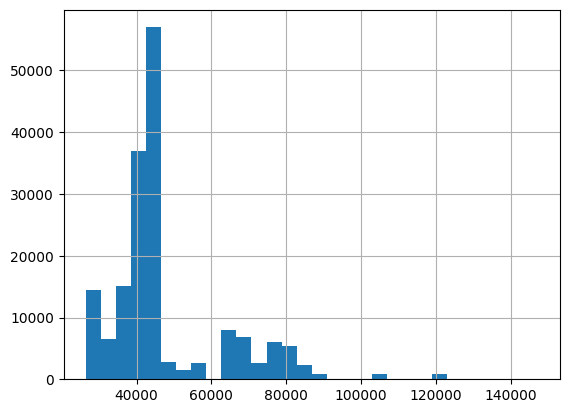

In [ ]:
## Preparing Data for Categorical Work + Random Forest Classification

# cut data into 3 tiers
mdf3 = mdf.copy()
bins = [0, 40000, 70000, 85000, mdf2['msrp'].max()+1] # personally chosen bins based on real life pricing
labels = ['Affordable','Mid-Tier','Expensive', 'Luxury']

mdf3['price_tier'] = pd.cut(mdf2['msrp'],
                          bins=bins,
                          labels=labels,
                          include_lowest=True)
print("Cutoff edges:", bins)

#plot histogram of data for visual aid
mdf3['msrp'].hist(bins=30)


In [ ]:
# Identify Features that will be indicative of msrp
features = [
    'Model Year',
    #'Electric Range', removed else the dataset becomes memorizable
    'Make',
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'County',
    'Type'
]

# Build feature and data sets
X = mdf3[features].copy()
y = mdf3['price_tier']

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split

#split data into testing and training set
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2, # 20% test size
    stratify=y,         # use strat to preserve proportions
    random_state=42
)

## Create and Run the Random Forest Model

#build the model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,    # number of trees
    max_depth=None,      # avoided setting a max depth to see how trees grow
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# run accuracy tests against the testing set

from sklearn.metrics import classification_report, confusion_matrix

# test it against the test sets
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred)) #returns a variety of information like accuracy and averages
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  Affordable       0.98      0.96      0.97     13163
   Expensive       0.96      0.88      0.92      3251
      Luxury       0.32      0.98      0.48       538
    Mid-Tier       0.96      0.92      0.94     17205

    accuracy                           0.94     34157
   macro avg       0.80      0.94      0.83     34157
weighted avg       0.96      0.94      0.94     34157

[[12696     7     0   460]
 [  220  2873     0   158]
 [    0     0   527    11]
 [   95   109  1137 15864]]


In [ ]:
# performing n cross fold validation using catboost, takes 4 minutes
!pip install catboost ## install catboost

# retrieve categorical features from feature set
cat_features_list = X.select_dtypes(include=['object','category']).columns.tolist()

from catboost import Pool, cv

X_clean = X.copy()

# iterate through each categorical feature
for c in cat_features_list:
    # replace NaN with a placeholder, then cast everything to str
    X_clean[c] = X_clean[c].fillna('missing').astype(str)

# create a Pool (tells CatBoost which cols are categorical)
pool = Pool(
    data=X_clean,
    label=y,
    cat_features=cat_features_list
)

# define your params
params = {
    'iterations': 100,
    'depth': 6,
    'learning_rate': 0.1,
    'loss_function': 'MultiClass',   #in order to handle the 3 categories
    'verbose': False,
    'random_seed': 42
}

# run 5-fold CV
cv_results = cv(
    params=params,
    pool=pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    stratified=True
)

print(cv_results.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.1 MB/s eta 0:00:00
Training on fold [0/5]

bestTest = 0.1405285126
bestIteration = 99

Training on fold [1/5]

bestTest = 0.1389255089
bestIteration = 99

Training on fold [2/5]

bestTest = 0.1360523996
bestIteration = 99

Training on fold [3/5]

bestTest = 0.1357320505
bestIteration = 99

Training on fold [4/5]

bestTest = 0.1344818536
bestIteration = 99

   iterations  test-MultiClass-mean  test-MultiClass-std  \
0           0              1.224527             0.000410   
1           1              1.114330             0.000593   
2           2              1.018769             0.000738   
3           3              0.916206             0.003069   
4           4              0.831821             0.005061   

   train-MultiClass-mean  train-MultiClass-std  
0               1.224940              0.000265  
1               1.114845              0.000399  
2               1.019477              0.000560  
3               0.917603 

Model 2: Location Based Regression Model

In [ ]:
# isolate relevant features
features = [
    'Model Year',
    'Electric Range',
    'msrp',
    'Make',
    'Model',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    #'County',
    'Electric Utility',
    'Type'
]

# Create Features and Target sets
# use mdf2 from the mapping since it already has latitudinal and longitudinal values
X = mdf2[features].copy()
y = mdf2[['lon','lat']].copy()

X

Model Year  Electric Range   msrp     Make    Model  \
0             2019           220.0  35000    TESLA  MODEL 3   
1             2020           291.0  44990    TESLA  MODEL Y   
2             2023           205.0  41450  HYUNDAI  IONIQ 5   
3             2012           265.0  57400    TESLA  MODEL S   
4             2017            81.0  42400      BMW       I3   
...            ...             ...    ...      ...      ...   
171357        2023           206.0  38990    TESLA  MODEL 3   
171358        2023           216.0  43990    TESLA  MODEL Y   
171359        2018           249.0  78000    TESLA  MODEL S   
171360        2023           319.0  49800     AUDI       Q4   
171361        2023           272.0  52000      BMW       I4   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                 Clean Alternative Fuel Vehicle Eligible   
1                 Clean Alternative Fuel Vehicle Eligible   
2       Eligibility unknown as battery range has not b...   
3                 Clean Alternative Fuel Vehicle Eligible   
4                 Clean Alternative Fuel Vehicle Eligible   
...                                                   ...   
171357  Eligibility unknown as battery range has not b...   
171358  Eligibility unknown as battery range has not b...   
171359            Clean Alternative Fuel Vehicle Eligible   
171360  Eligibility unknown as battery range has not b...   
171361  Eligibility unknown as battery range has not b...   

                                         Electric Utility       Type  
0            CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)      Sedan  
1                                  PUGET SOUND ENERGY INC        CUV  
2                                  PUGET SOUND ENERGY INC        CUV  
3                                  PUGET SOUND ENERGY INC      Sedan  
4           PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  Hatchback  
...                                                   ...        ...  
171357  BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...      Sedan  
171358       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)        CUV  
171359  BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...      Sedan  
171360                             PUGET SOUND ENERGY INC        CUV  
171361      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)      Sedan  

[170783 rows x 8 columns]

In [ ]:
#preprocessing
from sklearn.pipeline       import Pipeline
from sklearn.compose        import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble       import RandomForestRegressor
from sklearn.multioutput    import MultiOutputRegressor

# Seperate numeric columns and categorical columns
num_cols = ['Model Year', 'Electric Range', 'msrp']
cat_cols = [
    'Make', 'Model',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    #'County',
    'Electric Utility', 'Type'
]

# Define transformers for each group:
#    - StandardScaler: centers & scales numeric features to the mean=0, sd=1
#    - OneHotEncoder: turns each category into its own binary column (0 or 1),
#      ignoring any unseen categories at predict time
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),     num_cols),
    ('cat', OneHotEncoder(
                handle_unknown='ignore',  # unseen categories → all zeros (to handle test split edge cases)
                sparse_output=False               # produce a dense array
            ),
     cat_cols)
])

# build da model
# wrap a RandomForest in a multi-output regressor
multi_rf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=30, max_depth=10, random_state=42, n_jobs=-1) #reduce n estimators AND reduce max depth to hopefully speed up model
)

pipeline = Pipeline([
    ('prep', preprocessor),
    ('reg',  multi_rf)
])

In [ ]:
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#use pipeline to fit the trainingsets
pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Model Year',
                                                   'Electric Range', 'msrp']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Model',
                                                   'Clean Alternative Fuel '
                                                   'Vehicle (CAFV) Eligibility',
                                                   'Electric Utility',
                                                   'Type'])])),
                ('reg',
                 MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                                      n_estimators=30,
                                                                      n_jobs=-1,
                                                                      random_state=42)))])

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = pipeline.predict(X_test)

import numpy as np

# compute mean squared error
mse_lon = mean_squared_error(y_test['lon'], y_pred[:, 0])
mse_lat = mean_squared_error(y_test['lat'], y_pred[:, 1])

# then take square roots
rmse_lon = np.sqrt(mse_lon)
rmse_lat = np.sqrt(mse_lat)

print(f"RMSE longitude: {rmse_lon:.4f}°, latitude: {rmse_lat:.4f}°")

RMSE longitude: 0.4220°, latitude: 0.2792°


In [ ]:
# N Fold Cross Validation, takes 10 MINUTES

from sklearn.model_selection import KFold

cv = KFold(
    n_splits=5,       # 5-fold CV
    shuffle=True,     # mix up rows before splitting
    random_state=42
)

from sklearn.model_selection import cross_val_score
import numpy as np


pipeline.named_steps['reg'].estimator.n_jobs = -1  # if using MultiOutputRegressor, set on its `.estimator`

# run CV (this will run five fits on the pipeline)
neg_mse_scores = cross_val_score(
    pipeline,
    X,                  # feature dataframe
    y,                  # lon,lat DF
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1           # use aLL CORES
)

# convert to RMSE per fold
rmse_scores = np.sqrt(-neg_mse_scores)
print("Fold RMSEs:", np.round(rmse_scores, 3))
print("Mean RMSE:  ", rmse_scores.mean().round(3))
print("Std RMSE:   ", rmse_scores.std().round(3))


Fold RMSEs: [0.358 0.351 0.345 0.357 0.348]
Mean RMSE:   0.352
Std RMSE:    0.005


In [ ]:
pipeline.get_params().keys()

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
# took 16 MINUTES
param_dist = {
    'reg__estimator__n_estimators':      [30,  50, 100, 200],
    'reg__estimator__max_depth':         [None, 10, 20, 30],
    # removed below to speed up validation
    #'reg__estimator__min_samples_split': [2,    5,  10],
    #'reg__estimator__min_samples_leaf':  [1,    2,   4],
    #'reg__estimator__max_features':      ['auto','sqrt','log2']
}

#using halving random search to
search = HalvingRandomSearchCV(
    pipeline,
    param_distributions=param_dist,
    factor=3,            # only keep top 1/3 each round
    max_resources='auto',# rely on CV to auto-determine largest resourece budget
    min_resources=10,    # start with 10 trees as a min
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

search.fit(X_train, y_train)
print("Best params:", search.best_params_)
best_model = search.best_estimator_


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 10
max_resources_: 136626
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 10
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=13662. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 6
n_resources: 30
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 2
n_resources: 90
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best params: {'reg__estimator__n_estimators': 200, 'reg__estimator__max_depth': 20}


In [ ]:
y_test
X_test

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = best_model.predict(X_test)
rmse_lon = np.sqrt(mean_squared_error(y_test['lon'], y_pred[:,0]))
rmse_lat = np.sqrt(mean_squared_error(y_test['lat'], y_pred[:,1]))
print(f"Tuned RMSE → lon: {rmse_lon:.4f}°, lat: {rmse_lat:.4f}°")

Tuned RMSE → lon: 0.2866°, lat: 0.2341°


Model 3: Regression Model for Range

In [ ]:
mdf.head()

County      City State  Postal Code  Model Year     Make    Model  \
0      King   Seattle    WA      98178.0        2019    TESLA  MODEL 3   
1    Kitsap   Poulsbo    WA      98370.0        2020    TESLA  MODEL Y   
2    Kitsap    Olalla    WA      98359.0        2023  HYUNDAI  IONIQ 5   
3  Thurston   Olympia    WA      98502.0        2012    TESLA  MODEL S   
4      King  Bellevue    WA      98004.0        2017      BMW       I3   

            Electric Vehicle Type  \
0  Battery Electric Vehicle (BEV)   
1  Battery Electric Vehicle (BEV)   
2  Battery Electric Vehicle (BEV)   
3  Battery Electric Vehicle (BEV)   
4  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicle Eligible           291.0   
2  Eligibility unknown as battery range has not b...           205.0   
3            Clean Alternative Fuel Vehicle Eligible           265.0   
4            Clean Alternative Fuel Vehicle Eligible            81.0   

   Legislative District             Vehicle Location  \
0                  37.0  POINT (-122.23825 47.49461)   
1                  23.0  POINT (-122.64681 47.73689)   
2                  26.0  POINT (-122.54729 47.42602)   
3                  22.0  POINT (-122.92333 47.03779)   
4                  48.0   POINT (-122.1872 47.61001)   

                                Electric Utility  2020 Census Tract   msrp  \
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  35000   
1                         PUGET SOUND ENERGY INC       5.303509e+10  44990   
2                         PUGET SOUND ENERGY INC       5.303509e+10  41450   
3                         PUGET SOUND ENERGY INC       5.306701e+10  57400   
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  42400   

        Type  
0      Sedan  
1        CUV  
2        CUV  
3      Sedan  
4  Hatchback

In [ ]:
mdf.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract', 'msrp', 'Type'],
      dtype='object')

In [ ]:
# create new mdf, dropping location based columns
r_mdf = mdf.drop(columns=[
    'County','City','State','Postal Code',
    'Legislative District','Vehicle Location',
    'Electric Utility','2020 Census Tract'
])

# create feature and target sets
X = r_mdf.drop(columns=["Electric Range", "Model"])
y = r_mdf["Electric Range"]

In [ ]:
from sklearn.model_selection import train_test_split

#split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing

# Separate numerical and categorical columns
n_cols = ['Model Year', 'msrp']
c_cols = [
    'Make',
    #'Model', removed model to test
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Type'
]

# numeric pipeline, scale on median value
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# categorical pipeline, one hot encode
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# create preprocessor with the two pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, n_cols),
    ("cat", cat_pipeline, c_cols),
])


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#create general pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

In [ ]:
# train
pipeline.fit(X_train, y_train)

# predict on test set
y_pred = pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2   = r2_score(y_test, y_pred)

# return root mean squared and R values for accuracy
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²:   {r2:.3f}")

Test RMSE: 4.37
Test R²:   0.994


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20]
}

search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("CV  R²:", search.best_score_)
print("Test R²:", search.score(X_test, y_test))


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np


# 5-fold CV for negative mean squared error
neg_mse_scores = cross_val_score(
    pipeline, X, y,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1
)
rmse_scores = np.sqrt(-neg_mse_scores) #additionally converts it to RMSE

# 5-fold CV for R squared
r2_scores = cross_val_score(
    pipeline, X, y,
    cv=5,
    scoring='r2',
    n_jobs=1
)

print("5-Fold CV RMSE scores:", np.round(rmse_scores, 2))
print(f"Mean RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
print("5-Fold CV R² scores:", np.round(r2_scores, 3))
print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")


5-Fold CV RMSE scores: [4.34 4.26 4.31 4.35 4.26]
Mean RMSE: 4.30 ± 0.04
5-Fold CV R² scores: [0.994 0.994 0.994 0.994 0.994]
Mean R²: 0.994 ± 0.000


### PLOTS


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

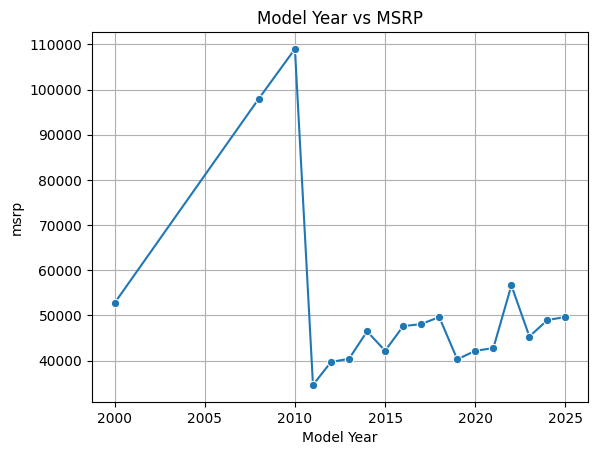

In [ ]:
avg_msrp_year = mdf.groupby("Model Year")["msrp"].mean().reset_index()
sns.lineplot(data=avg_msrp_year, x="Model Year", y="msrp", marker='o');
plt.grid(True)
plt.title("Model Year vs MSRP");

When plotting MSRP vs Year, we see strange behavior. Let's see if we can explain it by looking at the number of EVs per year


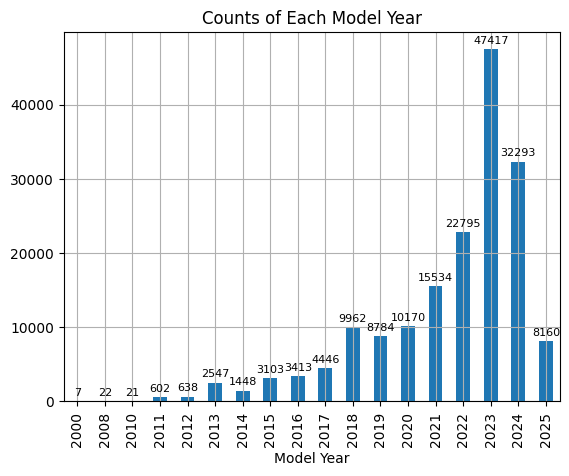

In [ ]:
counts = mdf['Model Year'].value_counts().sort_index()
ax = counts.plot(kind='bar')

plt.grid(True)
plt.title("Counts of Each Model Year");
for i, val in enumerate(counts.values):
    ax.text(i, val + 500, str(val), ha='center', va='bottom', fontsize=8)

Notice how there are only 50 vehicles from 2000-2010. This skews the data from there.

In [ ]:
mdf[mdf['Model Year'].isin([2000,2008,2010])][['Make','Model','Model Year','msrp']].drop_duplicates()

Make     Model  Model Year    msrp
1740   FORD    RANGER        2000   52720
2742  TESLA  ROADSTER        2008   98000
7354  TESLA  ROADSTER        2010  109000

Especially as these vehicles are very expensive

That explains it! There were only 3 unique types of vehicles in 2000, 2008, and 2010. This skewed the msrp for those years.

So, we drop the 2000-2010 vehicles and replot.

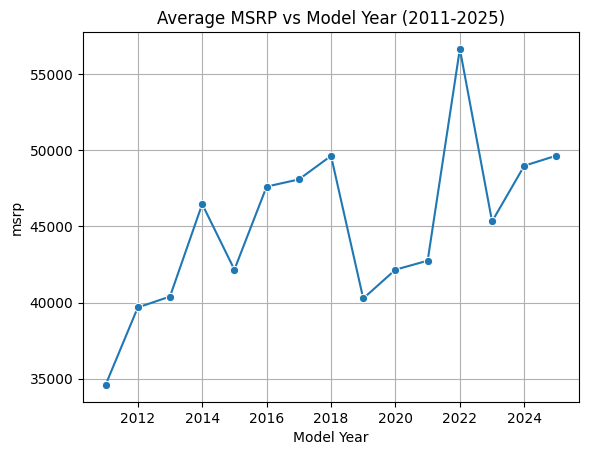

In [ ]:
filtered = mdf[mdf['Model Year'] >= 2011].copy()
sns.lineplot(data=filtered.groupby("Model Year")["msrp"].mean().reset_index(),
             x="Model Year", y="msrp", marker='o');
plt.title("Average MSRP vs Model Year (2011-2025)");
plt.grid(True)

Lets see if we can explain behavior, from the drops in 2018 and 2022 to the rise in 2021.

In [ ]:
avg_price_per_make_year = (
    filtered.groupby(['Make', 'Model Year'])['msrp']
    .mean()
    .reset_index()
)


fig = go.Figure()

makes = avg_price_per_make_year['Make'].unique()

# dot for each make
for make in makes:
    df_make = avg_price_per_make_year[avg_price_per_make_year['Make'] == make]
    fig.add_trace(go.Scatter(
        x=df_make['Model Year'],
        y=df_make['msrp'],
        mode='lines+markers',
        name=make,
        visible=True  # We'll toggle visibility below
    ))

# dropdown menu
dropdown_buttons = [
    dict(label="All",
         method="update",
         args=[{"visible": [True]*len(makes)},
               {"title": "Average MSRP by Make per Model Year"}])
]

# each make gets a button
for i, make in enumerate(makes):
    visible = [False] * len(makes)
    visible[i] = True
    dropdown_buttons.append(
        dict(label=make,
             method="update",
             args=[{"visible": visible},
                   {"title": f"Average MSRP: {make}"}])
    )

fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=1.1,
            y=1.15,
            xanchor="left",
            yanchor="top"
        )
    ],
    title="Average MSRP by Make per Model Year",
    xaxis_title="Model Year",
    yaxis_title="MSRP ($)",
    height=600
)
fig.update_yaxes(range=[0, avg_price_per_make_year['msrp'].max() * 1.1])
fig.update_xaxes(range=[2010.5, 2025.5])

fig.show()
#fig.write_html("plot.html", include_plotlyjs='cdn')
#from google.colab import files
#files.download("/content/plot.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

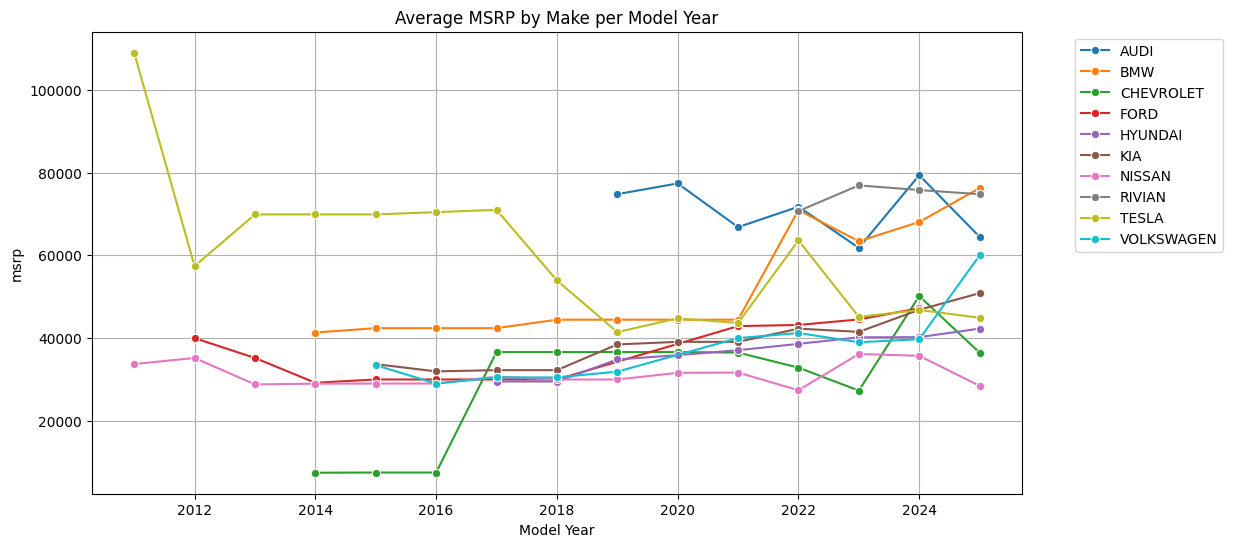

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_price_per_make_year,
    x='Model Year',
    y='msrp',
    hue='Make',
    marker='o'
)

plt.title("Average MSRP by Make per Model Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Notice how Tesla's MSRP change seems to dominate the market, EXCEPT for in 2011. Even though Tesla's MSRP is so high, the average MSRP is low.

In [ ]:
filtered[(filtered['Model Year']==2011)][['Model','Model Year','msrp']].value_counts()

Model     Model Year  msrp  
LEAF      2011        33720     595
ROADSTER  2011        109000      7
Name: count, dtype: int64

This is because there were only 7 tesla roadsters compared to the 595 leafs.

However, let's look at how the makes EV counts affect the average MSRP as well.

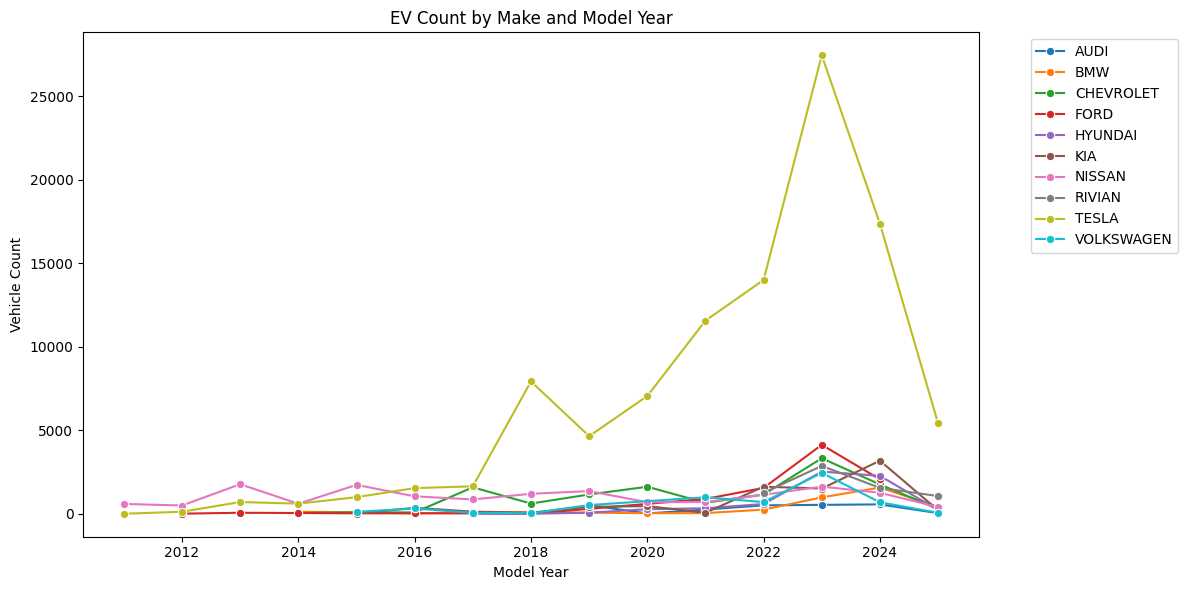

In [ ]:
ev_counts_by_make_year = (
    filtered.groupby(['Make', 'Model Year'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=ev_counts_by_make_year,
    x='Model Year',
    y='count',
    hue='Make',
    marker='o'
)
plt.title("EV Count by Make and Model Year")
plt.ylabel("Vehicle Count")
plt.xlabel("Model Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


As can be seen, Tesla completely dominates the market from 2018 and onward. This is why Tesla's MSRP affects the average so much, but only from 2018 and onward.

How can we see what is has the best price per range?

In [11]:
import plotly.graph_objects as go


traces = []
for make in top:
    df_make = mdf[mdf['Make'] == make]
    traces.append(go.Scatter3d(
        x=df_make['Model Year'],
        y=df_make['msrp'],
        z=df_make['Electric Range'],
        mode='markers',
        name=make,
        visible=True if make == 'TESLA' else False,  # Default to showing TESLA
        marker=dict(size=4),
        hovertext=df_make['Model']
    ))

# dropdown buttons
dropdown_buttons = [
    dict(label='All',
         method='update',
         args=[{'visible': [True]*len(top)},
               {'title': 'MSRP vs Year vs Range - All Makes'}])
]

for i, make in enumerate(top):
    visibility = [False]*len(top)
    visibility[i] = True
    dropdown_buttons.append(
        dict(label=make,
             method='update',
             args=[{'visible': visibility},
                   {'title': f'MSRP vs Year vs Range - {top}'}])
    )


layout = go.Layout(
    title='MSRP vs Year vs Range - TESLA',
    scene=dict(
        xaxis_title='Model Year',
        yaxis_title='Base MSRP',
        zaxis_title='Electric Range'
    ),
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'x': 0.1,
        'xanchor': 'left',
        'y': 1.1,
        'yanchor': 'top'
    }]
)

fig = go.Figure(data=traces, layout=layout)
fig.show()
fig.write_html("/content/msrp_year_range_3d.html", include_plotlyjs='cdn')

Using this, we can see how the MSRP and Range affect per make. It's a good sign that many vehicles are clustered on low cost and high range, indicating competitiveness.